In [2]:
from google.colab import drive

drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/My Drive/flower_photos',
    image_size=(128, 128),
    batch_size=32
)


Found 3698 files belonging to 5 classes.


In [4]:


train_dataset = dataset.take(int(0.8 * len(dataset)))
validation_dataset = dataset.skip(int(0.8 * len(dataset)))

def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)


In [5]:
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),


    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(dataset.class_names), activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    verbose=1
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9749 - loss: 0.0809 - val_accuracy: 0.8143 - val_loss: 1.4611
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9786 - loss: 0.0532 - val_accuracy: 0.7997 - val_loss: 1.5165
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9873 - loss: 0.0467 - val_accuracy: 0.8130 - val_loss: 1.4375
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9808 - loss: 0.0413 - val_accuracy: 0.8103 - val_loss: 1.4019
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9840 - loss: 0.0554 - val_accuracy: 0.8130 - val_loss: 1.4067
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9872 - loss: 0.0468 - val_accuracy: 0.8143 - val_loss: 1.2551
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9796 - loss: 0.0621 - val_accuracy: 0.8156 - val_loss: 1.2907
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9804 - loss: 0.0570 - val_accuracy: 0.8196 - v

In [15]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 351ms/step - accuracy: 0.8379 - loss: 1.0903
Validation Loss: 1.3479315042495728
Validation Accuracy: 0.8037135004997253


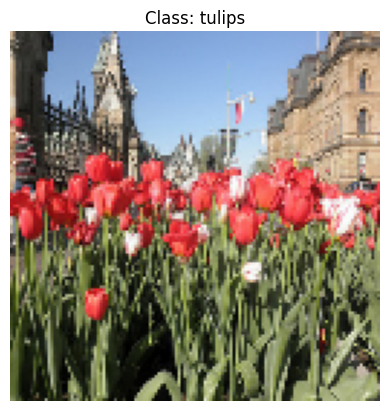

In [14]:
import matplotlib.pyplot as plt


class_names = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]



for image_batch, label_batch in validation_dataset.take(1):
    image = image_batch[0].numpy()
    label = label_batch[0].numpy()


    if image.max() <= 1.0:
        image = (image * 255).astype("uint8")

    class_name = class_names[label]


    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.axis("off")
    plt.show()
